In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime

<IPython.core.display.Javascript object>

### First, I want to look at the granularity difference between:
* last 60 days of the 5-year span with a 1d interval of the complete index,
* last 60 days of the maximum possible span with a 1d interval of a per-stock index,
* 60-day span with a 5m interval

In [5]:
y5 = pd.read_csv("./data/stocks/gspc_5y_2021-01-15_0032H -0800.zip")
d60 = pd.read_csv("./data/stocks/gspc_60d_5min_2021-01-15_0031H -0800.zip")
spx_complete = pd.read_csv("./data/stocks/spx_indexed.zip")

print(y5.shape)
print(d60.shape)
print(spx_complete.shape)

(1259, 7)
(4970, 6)
(1261, 3031)


<IPython.core.display.Javascript object>

The size difference is already notable with the more granular dataset being 3.9x longer than those with 1d intervals.

In [27]:
y5_60 = y5[-60:]
y5[-60:].describe()

,Open,High,Low,Close,Adj Close,Volume
count,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01
mean,3610.162992,3631.082666,3590.458512,3612.121334,3612.121334,4.631045e+09
std,139.620819,135.735966,143.366182,141.572817,141.572817,1.020291e+09
min,3277.169922,3304.929932,3233.939941,3269.959961,3269.959961,1.885090e+09
25%,3550.242554,3566.070007,3516.912537,3543.400024,3543.400024,4.147160e+09
50%,3649.825073,3668.434937,3634.939941,3654.969971,3654.969971,4.663955e+09
75%,3700.055054,3715.572449,3688.747559,3702.452515,3702.452515,5.031288e+09
max,3815.050049,3826.689941,3792.860107,3824.679932,3824.679932,8.556610e+09


<IPython.core.display.Javascript object>

In [29]:
y5_60.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 1199 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       60 non-null     object 
 1   Open       60 non-null     float64
 2   High       60 non-null     float64
 3   Low        60 non-null     float64
 4   Close      60 non-null     float64
 5   Adj Close  60 non-null     float64
 6   Volume     60 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.4+ KB


<IPython.core.display.Javascript object>

In [30]:
y5_60.isna().mean()

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

<IPython.core.display.Javascript object>

In [26]:
d60.describe()

,Open,High,Low,Close,Volume
count,4970.000000,4970.000000,4970.000000,4970.000000,4.970000e+03
mean,3612.535445,3614.291044,3610.748933,3612.554814,3.008193e+07
std,140.341278,139.938524,140.789178,140.358892,7.520909e+07
min,3236.159912,3243.449951,3233.939941,3236.100098,0.000000e+00
25%,3539.984985,3542.337463,3537.010000,3538.907532,1.704632e+07
50%,3655.704956,3657.785034,3653.920044,3655.875000,2.128303e+07
75%,3703.497498,3704.727539,3702.285034,3703.489990,2.879573e+07
max,3825.750000,3826.689941,3824.680000,3825.719971,2.636960e+09


<IPython.core.display.Javascript object>

In [25]:
d60.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  4970 non-null   object 
 1   Open      4970 non-null   float64
 2   High      4970 non-null   float64
 3   Low       4970 non-null   float64
 4   Close     4970 non-null   float64
 5   Volume    4970 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 233.1+ KB


<IPython.core.display.Javascript object>

In [31]:
d60.isna().mean()

Datetime    0.0
Open        0.0
High        0.0
Low         0.0
Close       0.0
Volume      0.0
dtype: float64

<IPython.core.display.Javascript object>

In [21]:
spx_complete.drop(columns=['Unnamed: 0'], inplace=True)
spx_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Columns: 3030 entries, VNT to EQIX.5
dtypes: object(3030)
memory usage: 29.2+ MB


<IPython.core.display.Javascript object>

In [32]:
spx_complete.isna().mean()

VNT       0.946075
VNT.1     0.946075
VNT.2     0.946075
VNT.3     0.946075
VNT.4     0.946075
            ...   
EQIX.1    0.000793
EQIX.2    0.000793
EQIX.3    0.000793
EQIX.4    0.000793
EQIX.5    0.000793
Length: 3030, dtype: float64

<IPython.core.display.Javascript object>

Haven't gone through doing the S&P 500 Index computation yet, so *spx_complete* will remain as is for now.

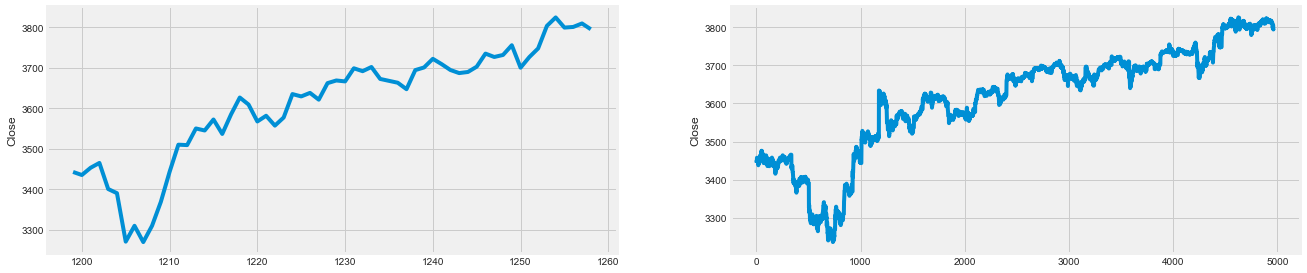

<IPython.core.display.Javascript object>

In [38]:
stocks = [y5_60, d60]

plt.figure(figsize=(20, 10))

for i, data in enumerate(stocks, 1):
    plt.subplot(2,2,i)
    data['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)

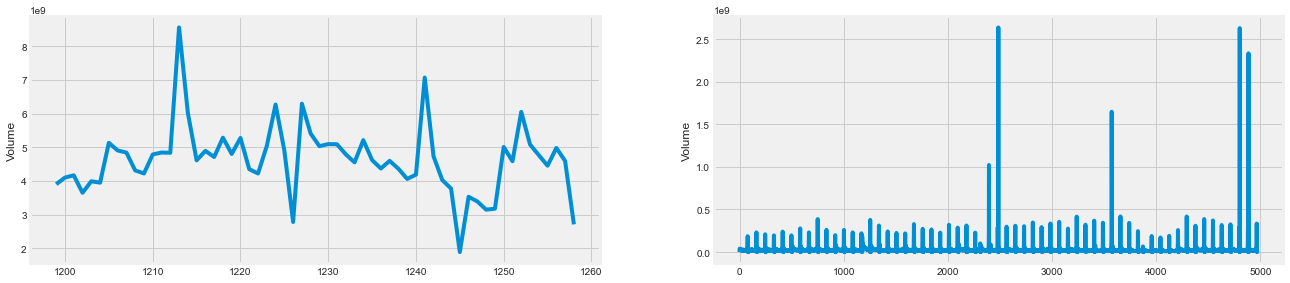

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(20, 10))

for i, data in enumerate(stocks, 1):
    plt.subplot(2,2,i)
    data['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)

In [41]:
ma_int = [10, 20, 50]

for ma in ma_int:
    for data in stocks:
        column_name = f"MA for {ma} days"
        data[column_name] = data['Close'].rolling(ma).mean()

<IPython.core.display.Javascript object>

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        4970 non-null   object 
 1   Open            4970 non-null   float64
 2   High            4970 non-null   float64
 3   Low             4970 non-null   float64
 4   Close           4970 non-null   float64
 5   Volume          4970 non-null   int64  
 6   MA for 10 days  4961 non-null   float64
 7   MA for 20 days  4951 non-null   float64
 8   MA for 50 days  4921 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 349.6+ KB


<IPython.core.display.Javascript object>

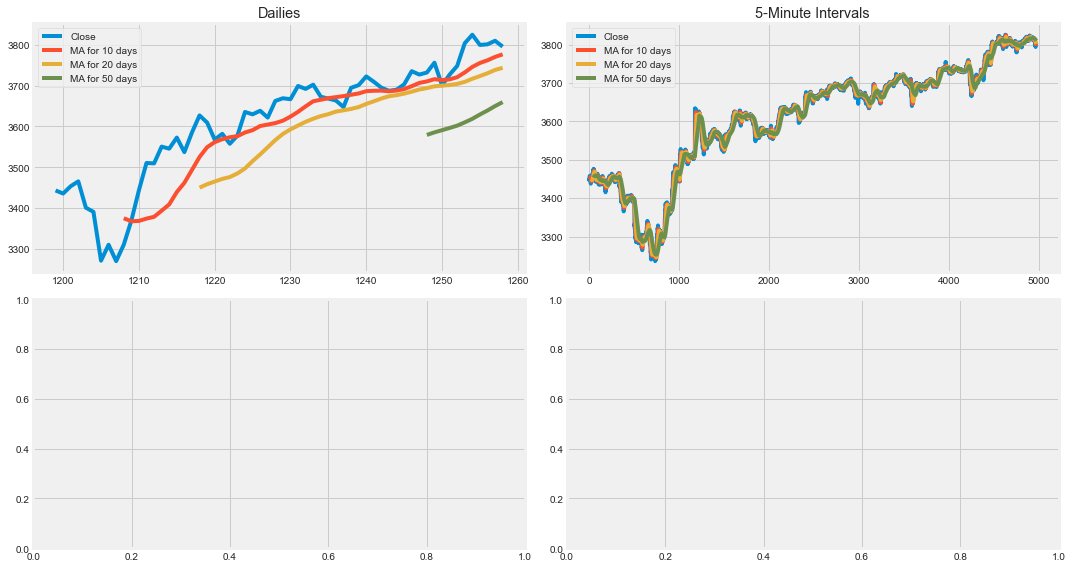

<IPython.core.display.Javascript object>

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

y5_60[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Dailies')

d60[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('5-Minute Intervals')

fig.tight_layout()

More granular data present tighter moving averages even over a 50-day period.

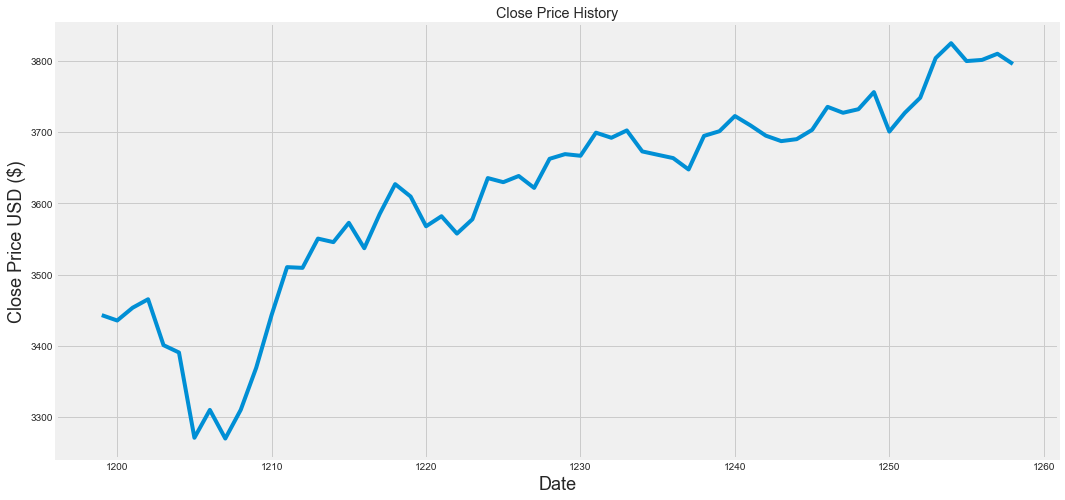

<IPython.core.display.Javascript object>

In [68]:
# predicting the dailies

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(y5_60['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [70]:
ndata = y5_60[['Close']]
ndataset = ndata.values
train_data_len = int(np.ceil(len(ndataset) * 0.8))
print(train_data_len)

48


<IPython.core.display.Javascript object>

Now, the problems seem to appear considering with daily granularity, the train and test size are 48 and 12 respectively.

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(ndataset)
scaled_data

array([[0.31215778],
       [0.29852918],
       [0.33085167],
       [0.35230376],
       [0.23617323],
       [0.21762326],
       [0.00192902],
       [0.07237913],
       [0.        ],
       [0.07261327],
       [0.17882888],
       [0.31273433],
       [0.43353404],
       [0.43171328],
       [0.50573272],
       [0.4967733 ],
       [0.54568064],
       [0.48141416],
       [0.56819649],
       [0.64347774],
       [0.61214682],
       [0.53690167],
       [0.56228399],
       [0.51842388],
       [0.55456833],
       [0.65880078],
       [0.64841715],
       [0.66410109],
       [0.63395937],
       [0.70754617],
       [0.71937206],
       [0.71524378],
       [0.77365189],
       [0.7607442 ],
       [0.77929417],
       [0.7262405 ],
       [0.71773175],
       [0.70936693],
       [0.68057768],
       [0.76553969],
       [0.7773471 ],
       [0.81576299],
       [0.79220142],
       [0.76608015],
       [0.75227154],
       [0.757229  ],
       [0.78075447],
       [0.838

<IPython.core.display.Javascript object>

In [74]:
from sklearn.model_selection import train_test_split



<IPython.core.display.Javascript object>